### Wisdom Sparke -- An Inventory Planning Project Through Pandas, NumPy & API 
###### (Data Sources: Amazon Book Sales CSV file & 2 New York Times API endpoints)

### AMAZON DATAFRAME  

In [2]:
import pandas as pd 

In [4]:
df = pd.read_csv(r"C:\Users\Atefah\Desktop\IRONHACK\Project_Book\kindle_data-v2.csv")

In [7]:
df.shape

(133102, 16)

In [9]:
df.head(2)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships


## Filtering Process with Conditions

In [10]:
# Ensure 'reviews' is numeric before applying conditions
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Drop rows where 'reviews' is NaN (ensuring valid numeric values)
df = df.dropna(subset=['reviews'])

# Apply the strict conditional filtering
df = df[(df['stars'] >= 4.5) & (df['reviews'] >= 4000)]

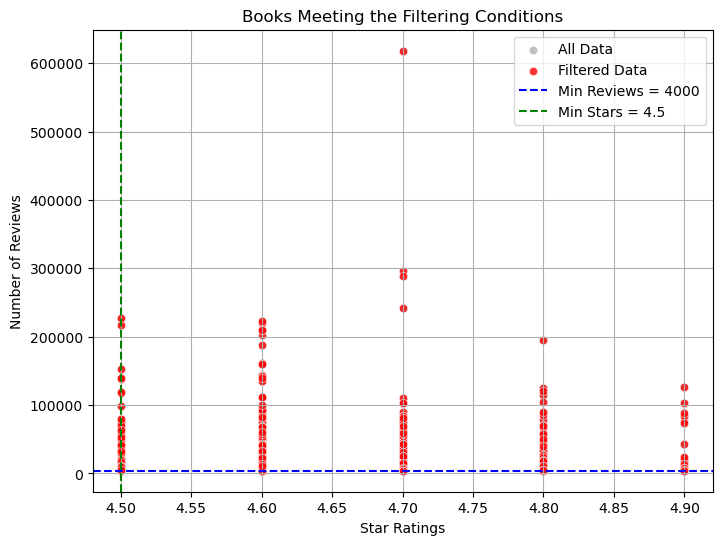

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot before filtering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['stars'], y=df['reviews'], alpha=0.5, color='gray', label="All Data")

# Scatter plot after filtering
filtered_df = df[(df['stars'] >= 4.5) & (df['reviews'] >= 4000)]
sns.scatterplot(x=filtered_df['stars'], y=filtered_df['reviews'], alpha=0.8, color='red', label="Filtered Data")

# Add reference lines for conditions
plt.axhline(4000, color="blue", linestyle="--", label="Min Reviews = 4000")
plt.axvline(4.5, color="green", linestyle="--", label="Min Stars = 4.5")

# Labels and title
plt.xlabel("Star Ratings")
plt.ylabel("Number of Reviews")
plt.title("Books Meeting the Filtering Conditions")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [12]:
df.shape

(3934, 16)

## Price Distribution 

In [16]:
price_stats = df["price"].describe()
print(price_stats)

count    3934.000000
mean        8.631731
std         5.322166
min         0.000000
25%         4.990000
50%         8.990000
75%        11.990000
max        74.990000
Name: price, dtype: float64


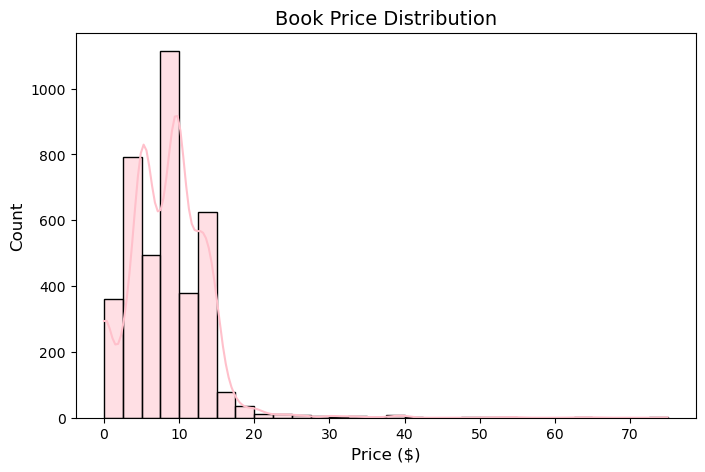

In [17]:
# Histogram of book prices
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True, color="pink")

# Titles and labels
plt.title("Book Price Distribution", fontsize=14)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Show the plot
plt.show()

## Books Selection

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 1. Top 10 Book Categories by Count
top_categories = df["category_name"].value_counts().head(10)
print("Top 10 Book Categories by Count:\n", top_categories)

Top 10 Book Categories by Count:
 category_name
Literature & Fiction          1067
Teen & Young Adult             720
Science Fiction & Fantasy      554
Biographies & Memoirs          414
Religion & Spirituality        279
Foreign Language               259
Politics & Social Sciences     189
Nonfiction                      92
Self-Help                       70
History                         69
Name: count, dtype: int64


### TOP 10 CATAGORIES DISTRIBUTION 

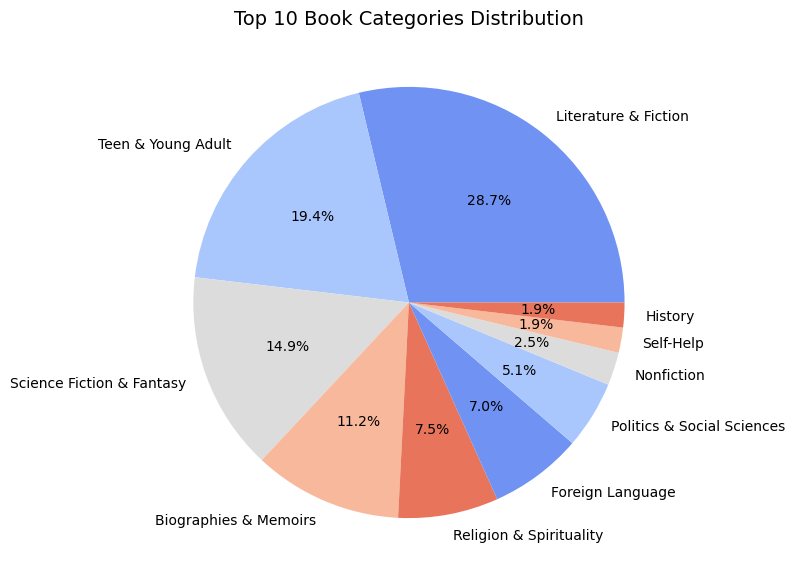

In [20]:
# Pie chart for top categories
plt.figure(figsize=(7, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 5))
plt.title("Top 10 Book Categories Distribution", fontsize=14)

# Show the plot
plt.show()

### TOP 20 BOOKS AMONG OUR SELECTED CATAGORIES 

In [21]:
from tabulate import tabulate

In [22]:

# Define the target categories
target_categories = ["Literature & Fiction", "Teen & Young Adult", "Science Fiction & Fantasy", "Biographies & Memoirs",
                     "Religion & Spirituality", "Foreign Language", "Politics & Social Sciences", "Nonfiction", 
                     "Self-Help", "History"]

# Extract 20 books from each category and display them as tables
for category in target_categories:
    books_in_category = df[df["category_name"] == category].head(20)
    if not books_in_category.empty:
        print(f"\n Category: {category}")
        display(books_in_category[["title", "author"]].style.set_table_attributes("style='display:inline'").set_caption(category))


 Category: Literature & Fiction


,title,author
28600,The Covenant of Water (Oprah's Book Club),Abraham Verghese
28602,Lessons in Chemistry: A Novel,Bonnie Garmus
28603,Demon Copperhead: A Pulitzer Prize Winner,Barbara Kingsolver
28604,A Court of Mist and Fury (A Court of Thorns and Roses Book 2),Sarah J. Maas
28606,A Court of Wings and Ruin (A Court of Thorns and Roses Book 3),Sarah J. Maas
28607,A Court of Thorns and Roses,Sarah J. Maas
28609,The Heaven & Earth Grocery Store: A Novel,James McBride
28611,Things We Never Got Over (Knockemout Book 1),Lucy Score
28615,The Five-Star Weekend,Elin Hilderbrand
28619,The Lost Bookshop: The most charming and uplifting novel of 2023 and the perfect gift for book lovers!,Evie Woods



 Category: Teen & Young Adult


,title,author
47868,Throne of Glass,Sarah J. Maas
47869,Heir of Fire (Throne of Glass Book 3),Sarah J. Maas
47870,Kingdom of Ash (Throne of Glass Book 7),Sarah J. Maas
47871,Empire of Storms (Throne Of Glass Series Book 5),Sarah J. Maas
47872,Queen of Shadows (Throne of Glass Book 4),Sarah J. Maas
47874,Crown of Midnight (Throne of Glass Book 2),Sarah J. Maas
47875,Tower of Dawn (Throne of Glass Book 6),Sarah J. Maas
47876,The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games),Suzanne Collins
47878,We'll Always Have Summer (Summer I Turned Pretty Book 3),Jenny Han
47879,The Assassin's Blade: The Throne of Glass Prequel Novellas (Throne Of Glass Series),Sarah J. Maas



 Category: Science Fiction & Fantasy


,title,author
59330,Fourth Wing (The Empyrean Book 1),Rebecca Yarros
59331,Throne of Glass eBook Bundle: An 8 Book Bundle,Sarah J. Maas
59332,A Court of Silver Flames (A Court of Thorns and Roses Book 5),Sarah J. Maas
59333,A Court of Thorns and Roses eBook Bundle: A 5 Book Bundle,Sarah J. Maas
59334,House of Sky and Breath (Crescent City),Sarah J. Maas
59338,Rhythm of War: Book Four of The Stormlight Archive,Brandon Sanderson
59345,Go Tell the Bees That I Am Gone: A Novel (Outlander Book 9),Diana Gabaldon
59347,Waybound (Cradle Book 12),Will Wight
59354,The Dark Forest (The Three-Body Problem Series Book 2),Cixin Liu
59366,The Covenant of Water: An Oprah's Book Club Selection,Abraham Verghese



 Category: Biographies & Memoirs


,title,author
32756,"The Wager: A Tale of Shipwreck, Mutiny and Murder",David Grann
32759,I'm Glad My Mom Died,Jennette Mccurdy
32760,Spare,"Prince Harry, The Duke of Sussex"
32763,The 48 Laws of Power,Robert Greene
32770,Man's Search for Meaning,Viktor E. Frankl
32773,Solito: A Memoir,Javier Zamora
32781,Empire of Pain: The Secret History of the Sackler Dynasty,Patrick Radden Keefe
32784,Greenlights,Matthew McConaughey
32785,"Maybe You Should Talk to Someone: A Therapist, HER Therapist, and Our Lives Revealed",Lori Gottlieb
32786,Steve Jobs,Walter Isaacson



 Category: Religion & Spirituality


,title,author
74370,The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),Don Miguel Ruiz
74371,The Power of Now: A Guide to Spiritual Enlightenment,Eckhart Tolle
74372,Becoming Supernatural: How Common People are Doing the Uncommon,Joe Dispenza
74374,The Artist's Way: 30th Anniversary Edition,Julia Cameron
74376,The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are,Brené Brown
74377,The Return of the Gods,Jonathan Cahn
74378,Breaking the Habit of Being Yourself: How to Lose Your Mind and Create a New One,Joe Dispenza
74381,101 Essays That Will Change The Way You Think,Brianna Wiest
74382,The 5 Love Languages: The Secret to Love that Lasts,Gary Chapman
74384,The Ruthless Elimination of Hurry: How to Stay Emotionally Healthy and Spiritually Alive in the Chaos of the Modern World,John Mark Comer



 Category: Foreign Language


,title,author
53609,Deja de ser tú (Crecimiento personal) (Spanish Edition),Joe Dispenza
53610,Este dolor no es mío (Spanish Edition),Mark Wolynn
53611,"Cómo hacer que te pasen cosas buenas: Entiende tu cerebro, gestiona tus emociones, mejora tu vida (Spanish Edition)",Marián Rojas Estapé
53612,El hombre en busca de sentido (Spanish Edition),Viktor Frankl
53614,Cómo ganar amigos e influir sobre las personas (Spanish Edition),DALE CARNEGIE
53617,Encuentra tu persona vitamina (Spanish Edition),Marian Rojas Estapé
53618,Últimos días en Berlín: Finalista Premio Planeta 2021 (Autores Españoles e Iberoamericanos) (Spanish Edition),Paloma Sánchez-Garnica
53619,El infinito en un junco: La invención de los libros en el mundo antiguo (Biblioteca de Ensayo / Serie mayor nº 105) (Spanish Edition),Irene Vallejo
53621,La hermana sombra (Las Siete Hermanas 3): La historia de Star (Spanish Edition),Lucinda Riley
53624,La hermana perdida (Las Siete Hermanas 7) (Spanish Edition),Lucinda Riley



 Category: Politics & Social Sciences


,title,author
43667,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson
43670,"The Daily Stoic: 366 Meditations on Wisdom, Perseverance, and the Art of Living",Ryan Holiday
43671,Meditations: A New Translation (Modern Library),Marcus Aurelius
43673,Four Thousand Weeks: Time Management for Mortals,Oliver Burkeman
43674,Come As You Are: Revised and Updated: The Surprising New Science That Will Transform Your Sex Life,Emily Nagoski Ph.D.
43677,The End of the World is Just the Beginning: Mapping the Collapse of Globalization,Peter Zeihan
43678,The Obstacle Is the Way: The Timeless Art of Turning Trials into Triumph,Ryan Holiday
43679,Caste: The Origins of Our Discontents,Isabel Wilkerson
43684,The Courage to Be Disliked: The Japanese Phenomenon That Shows You How to Change Your Life and Achieve Real Happiness,Ichiro Kishimi
43687,Don't Believe Everything You Think: Why Your Thinking Is The Beginning & End Of Suffering (Beyond Suffering Book 1),Joseph Nguyen



 Category: Nonfiction


,title,author
93742,The Fifth Agreement: A Practical Guide to Self-Mastery (A Toltec Wisdom Book),Don Miguel Ruiz
93745,"Business Model Generation: A Handbook for Visionaries, Game Changers, and Challengers (Strategyzer)",Alexander Osterwalder
93746,The Seven Spiritual Laws of Success: A Practical Guide to the Fulfillment of Your Dreams,Deepak Chopra
93754,The Empath's Survival Guide: Life Strategies for Sensitive People,Judith Orloff
93756,Dare: The New Way to End Anxiety and Stop Panic Attacks Fast,Barry McDonagh
93757,The Love Hypothesis: The Tiktok sensation and romcom of the year!,Ali Hazelwood
93764,"Prevent and Reverse Heart Disease: The Revolutionary, Scientifically Proven, Nutrition-Based Cure",Caldwell B. Esselstyn Jr. M.D.
93781,Team of Teams: New Rules of Engagement for a Complex World,Stanley McChrystal
93786,Talk Like TED: The 9 Public-Speaking Secrets of the World's Top Minds,Carmine Gallo
93791,Glute Lab: The Art and Science of Strength and Physique Training,Bret Contreras



 Category: Self-Help


,title,author
94634,"The Chimp Paradox: The Mind Management Program to Help You Achieve Success, Confidence, and Happine ss",Prof Steve Peters
94651,The Easy Way to Stop Smoking (Allen Carr's Easyway Book 10),Allen Carr
94655,Zen as F*ck (Zen as F*ck Journals) (Kindle Scribe Only),Monica Sweeney
94657,Barking Up the Wrong Tree: The Surprising Science Behind Why Everything You Know About Success Is (Mostly) Wrong,Eric Barker
94662,In the Realm of Hungry Ghosts: Close Encounters with Addiction,Gabor Maté
94665,Atlas of the Heart: Mapping Meaningful Connection and the Language of Human Experience,Brené Brown
94672,Word Power Made Easy: The Complete Handbook for Building a Superior Vocabulary,Norman Lewis
94720,Do the Work,Steven Pressfield
94732,The Code. the Evaluation. the Protocols: Striving to Become an Eminently Qualified Human,Jocko Willink
94744,He's Just Not That Into You: The No-Excuses Truth to Understanding Guys,Greg Behrendt



 Category: History


,title,author
89720,"Band of Brothers: E Company, 506th Regiment, 101st Airborne from Normandy to Hitler's Eagle's Nest",Stephen E. Ambrose
89721,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,Daniel James Brown
89722,The Art of Seduction,Robert Greene
89728,The Rise and Fall of the Third Reich,William L. Shirer
89731,The Escape Artist: The Man Who Broke Out of Auschwitz to Warn the World,Jonathan Freedland
89732,"Twilight of the Gods: War in the Western Pacific, 1944-1945 (The Pacific War Trilogy)",Ian W. Toll
89741,Killing the Killers: The Secret War Against Terrorists (Bill O'Reilly's Killing Series),Bill O'Reilly
89742,"Pacific Crucible: War at Sea in the Pacific, 1941-1942 (Vol. 1) (The Pacific War Trilogy): War at Sea in the Pacific, 1941–1942",Ian W. Toll
89743,"The Conquering Tide: War in the Pacific Islands, 1942-1944 (Vol. 2) (The Pacific War Trilogy): War in the Pacific Islands, 1942–1944",Ian W. Toll
89744,The Guns of August: The Outbreak of World War I; Barbara W. Tuchman's Great War Series (Modern Library 100 Best Nonfiction Books),Barbara W. Tuchman


## Final Amazon Book List Generated 

In [24]:
# Define the target categories
target_categories = [
    "Literature & Fiction", "Teen & Young Adult", "Science Fiction & Fantasy", "Biographies & Memoirs",
    "Religion & Spirituality", "Foreign Language", "Politics & Social Sciences", "Nonfiction", 
    "Self-Help", "History"
]

# Create an empty DataFrame to store selected books (only title and author)
selected_books = pd.DataFrame(columns=["title", "author"])

# Extract 20 books from each category and add to the final DataFrame
for category in target_categories:
    books_in_category = df[df["category_name"] == category][["title", "author"]].head(20)
    selected_books = pd.concat([selected_books, books_in_category], ignore_index=True)

In [25]:
selected_books

,title,author
0,The Covenant of Water (Oprah's Book Club),Abraham Verghese
1,Lessons in Chemistry: A Novel,Bonnie Garmus
2,Demon Copperhead: A Pulitzer Prize Winner,Barbara Kingsolver
3,A Court of Mist and Fury (A Court of Thorns an...,Sarah J. Maas
4,A Court of Wings and Ruin (A Court of Thorns a...,Sarah J. Maas
...,...,...
195,The Guns at Last Light: The War in Western Eur...,Rick Atkinson
196,"An Army at Dawn: The War in North Africa, 1942...",Rick Atkinson
197,The Forgotten 500: The Untold Story of the Men...,Gregory A. Freeman
198,Killing England: The Brutal Struggle for Ameri...,Bill O'Reilly


### NEW YORK TIMES APIs 

In [26]:
import requests
import pandas as pd

#### Retrieve Book Review URL

In [27]:
def get_nyt_book_reviews(api_key, title=None, author=None, isbn=None):
    
    # NYT Reviews API endpoint
    url = "https://api.nytimes.com/svc/books/v3/reviews.json"
    
    # Query parameters
    params = {
        "api-key": api_key,
        "title": title,
        "author": author,
        "isbn": isbn
    }
    
    try:
        # Make GET request to NYT API
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise error for bad requests
        
        # Parse JSON response
        data = response.json()
        
        # Check if results are available
        if data.get("results"):
            for review in data["results"]:
                print(f"\n📖 Book Title: {review['book_title']}")
                print(f"✍️ Author: {review['book_author']}")
                print(f"🗓️ Publication Date: {review['publication_dt']}")
                print(f"📝 Summary: {review['summary']}")
                print(f"🔗 Review URL: {review['url']}\n{'-'*50}")
        else:
            print("No reviews found for the given criteria.")
            
    except requests.exceptions.RequestException as error:
        print(f"Error: {error}")

# Replace with your NYT API key
API_KEY = "KRNfb5hISnWt9MtiZ90Afg4zjBk1MHPm"

# Example usage:
get_nyt_book_reviews(api_key=API_KEY, title=["becoming"])



📖 Book Title: Becoming
✍️ Author: Michelle Obama
🗓️ Publication Date: 2018-12-06
📝 Summary: The former first lady’s long-awaited new memoir recounts with insight, candor and wit her family’s trajectory from the Jim Crow South to Chicago’s South Side and her own improbable journey from there to the White House.
🔗 Review URL: https://www.nytimes.com/2018/12/06/books/review/michelle-obama-becoming-memoir.html
--------------------------------------------------


#### Retrieve All Best-sellers From All Lists 

In [28]:
# Replace with your NYT API Key
API_KEY = "KRNfb5hISnWt9MtiZ90Afg4zjBk1MHPm"

# NYT Books API endpoint for full bestsellers overview
URL = "https://api.nytimes.com/svc/books/v3/lists/full-overview.json"

# Request data from NYT API (latest list by leaving 'published_date' blank)
params = {"api-key": API_KEY}
response = requests.get(URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extract relevant data
    book_records = []
    for list_data in data["results"]["lists"]:
        list_name = list_data["list_name"]  # List category name

        for book in list_data["books"]:  # Loop through books in the list
            book_records.append({
                "list_name": list_name,
                "title": book["title"],
                "weeks_on_list": book.get("weeks_on_list", 0),  # Default to 0 if missing
                "author": book["author"],
                "rank": book["rank"],
                "price": book["price"]
                
            })

    # Convert to Pandas DataFrame
    df_nyt = pd.DataFrame(book_records)
    
    print(df_nyt.head())  # Preview first few rows

else:
    print("Error:", response.status_code, response.json())  # Print error details

                           list_name            title  weeks_on_list  \
0  Combined Print and E-Book Fiction       ONYX STORM              5   
1  Combined Print and E-Book Fiction   MIDNIGHT BLACK              1   
2  Combined Print and E-Book Fiction  THE NIGHTINGALE             70   
3  Combined Print and E-Book Fiction      FOURTH WING             83   
4  Combined Print and E-Book Fiction         DEEP END              3   

           author  rank price  
0  Rebecca Yarros     1  0.00  
1    Mark Greaney     2  0.00  
2  Kristin Hannah     3  0.00  
3  Rebecca Yarros     4  0.00  
4   Ali Hazelwood     5  0.00  


In [31]:
df_nyt.shape

(140, 6)

In [33]:
df_nyt.head(2)

,list_name,title,weeks_on_list,author,rank,price
0,Combined Print and E-Book Fiction,ONYX STORM,5,Rebecca Yarros,1,0.00
1,Combined Print and E-Book Fiction,MIDNIGHT BLACK,1,Mark Greaney,2,0.00


In [34]:
# Save as CSV (only keeping "title" & "author")

booklist = df_nyt[["title","author"]]
#booklist.to_csv("nyt_books_inventory.csv", index=False)
booklist

,title,author
0,ONYX STORM,Rebecca Yarros
1,MIDNIGHT BLACK,Mark Greaney
2,THE NIGHTINGALE,Kristin Hannah
3,FOURTH WING,Rebecca Yarros
4,DEEP END,Ali Hazelwood
...,...,...
135,THE ROSE BARGAIN,Sasha Peyton Smith
136,IF HE HAD BEEN WITH ME,Laura Nowlin
137,MURTAGH,Christopher Paolini
138,DIVINE RIVALS,Rebecca Ross


In [35]:
combined_list = pd.concat([selected_books, booklist])

In [36]:
combined_list

,title,author
0,The Covenant of Water (Oprah's Book Club),Abraham Verghese
1,Lessons in Chemistry: A Novel,Bonnie Garmus
2,Demon Copperhead: A Pulitzer Prize Winner,Barbara Kingsolver
3,A Court of Mist and Fury (A Court of Thorns an...,Sarah J. Maas
4,A Court of Wings and Ruin (A Court of Thorns a...,Sarah J. Maas
...,...,...
135,THE ROSE BARGAIN,Sasha Peyton Smith
136,IF HE HAD BEEN WITH ME,Laura Nowlin
137,MURTAGH,Christopher Paolini
138,DIVINE RIVALS,Rebecca Ross


In [37]:
# Define the file path for saving
output_file_path = "final_books_list.csv"  # This will save in the current working directory

# Save the filtered books to a CSV file
combined_list.to_csv(output_file_path, index=False)

# Print confirmation message
print(f"CSV file saved successfully: {output_file_path}")

CSV file saved successfully: final_books_list.csv


In [38]:
# Download this csv file into local computer.

from IPython.display import FileLink
# Create a download link
FileLink("final_books_list.csv")

C:\Users\Atefah\Desktop\IRONHACK\Wisdom_Sparkle\final_books_list.csv